In [1]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

    
df.dropna(inplace=True)
df = df.reset_index()[df.columns]
#print (df.isnull().sum())
'''def tenure_lab(t) :
    
    if t <= 12 :
        return 1
    elif (t > 12) & (t <= 24 ):
        return 2
    elif (t > 24) & (t <= 48) :
        return 3
    elif (t > 48) & (t <= 60) :
        return 4
    elif t > 60 :
        return 5

df["tenure"]=df["tenure"].map(tenure_lab)'''


#since we have 72 categories in tenure we will reduce the number of categories in it
#therefoe we made above function and to check how many categories each column has now,we are using the following loop

for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()
    #print ("Feature", c_n,"has", unique_cat,"unique categories")


X=df.drop('Churn',1)
Y=df.Churn

X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()

num_cols   = [x for x in X.columns if x not in todummy_list]
'''todummy_list.remove('tenure')
num_cols.insert(3,'tenure')'''
X_org=X.copy()

for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    #dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)
X=X.drop(['StreamingTV_No internet service','StreamingMovies_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service'],axis=1)
    
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

normalized_X = preprocessing.normalize(X[num_cols])
normalized_X = pd.DataFrame(normalized_X,columns=num_cols)
X=X.drop(num_cols,1)
X=pd.concat([X,normalized_X ],axis=1)

le = LabelEncoder()
Y= le.fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)



In [2]:
print(x_train.shape)
print(x_train.columns)

(5625, 41)
Index(['PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'Dependents_No',
       'Dependents_Yes', 'Partner_No', 'Partner_Yes', 'SeniorCitizen_0',
       'SeniorCitizen_1', 'gender_Female', 'gender_Male', 'te

In [10]:
'''-------------------------FEATURE SELECTION(chi2)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(f_classif, k=13)
fit=test.fit(x_train,y_train)
indices_selected= fit.get_support(indices=True)
columns_selected= [X.columns[i] for i in indices_selected]
x_train_selected=x_train[columns_selected]
x_test_selected=x_test[columns_selected]

print(x_train_selected.shape)
print(x_test_selected.shape)


(5625, 13)
(1407, 13)


In [11]:
indices_selected

array([ 2,  6,  8, 13, 15, 17, 19, 20, 23, 24, 38, 39, 40], dtype=int64)

In [12]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    # all parameters not specified are set to their defaults
    
   
        
        
        
    
 
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    
    print("tpr=",tpr," and 1-fpr=", 1-fpr)

    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    '''probs = m.predict_proba(x_test)
    probs = probs[:, 1]


    fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

    #plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr1, tpr1, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)'''


    import matplotlib.pyplot as plt
    import seaborn as sns

    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);


In [13]:
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
SVM=SVC(probability=True)

gs = GridSearchCV(SVM, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'C': 0.0 ++ np.arange(1, 5),'gamma':[0.04,0.05,0.06]},scoring='roc_auc')
gs.fit(x_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': array([1., 2., 3., 4.]), 'gamma': [0.04, 0.05, 0.06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [7]:
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
c=0
for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    c=c+1
    print("%d) %0.3f (+/-%0.03f) for %r"% (c,mean, std * 2, params))

print("Best score: %0.4f" % gs.best_score_)

print("Best parameters:\n",gs.best_params_)


print("Best estimator:\n",gs.best_estimator_)

1) 0.843 (+/-0.016) for {'C': 1.0, 'gamma': 0.04, 'kernel': 'linear'}
2) 0.805 (+/-0.023) for {'C': 1.0, 'gamma': 0.04, 'kernel': 'poly'}
3) 0.823 (+/-0.017) for {'C': 1.0, 'gamma': 0.04, 'kernel': 'rbf'}
4) 0.836 (+/-0.020) for {'C': 1.0, 'gamma': 0.04, 'kernel': 'sigmoid'}
5) 0.843 (+/-0.016) for {'C': 1.0, 'gamma': 0.05, 'kernel': 'linear'}
6) 0.801 (+/-0.020) for {'C': 1.0, 'gamma': 0.05, 'kernel': 'poly'}
7) 0.818 (+/-0.019) for {'C': 1.0, 'gamma': 0.05, 'kernel': 'rbf'}
8) 0.806 (+/-0.021) for {'C': 1.0, 'gamma': 0.05, 'kernel': 'sigmoid'}
9) 0.843 (+/-0.016) for {'C': 1.0, 'gamma': 0.06, 'kernel': 'linear'}
10) 0.800 (+/-0.017) for {'C': 1.0, 'gamma': 0.06, 'kernel': 'poly'}
11) 0.812 (+/-0.019) for {'C': 1.0, 'gamma': 0.06, 'kernel': 'rbf'}
12) 0.782 (+/-0.020) for {'C': 1.0, 'gamma': 0.06, 'kernel': 'sigmoid'}
13) 0.843 (+/-0.015) for {'C': 2.0, 'gamma': 0.04, 'kernel': 'linear'}
14) 0.801 (+/-0.019) for {'C': 2.0, 'gamma': 0.04, 'kernel': 'poly'}
15) 0.816 (+/-0.016) for {'C'

In [8]:
m=gs.best_estimator_
print (m)

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.04, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1038
           1       0.68      0.41      0.51       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.78      0.79      0.78      1407

[[965  73]
 [217 152]]
tpr= [0.         0.41192412 1.        ]  and 1-fpr= [1.         0.92967245 0.        ]


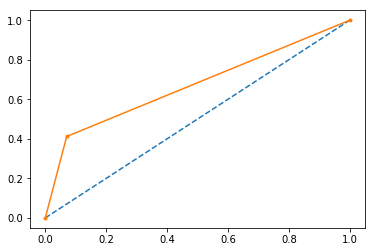

AUC: 0.671


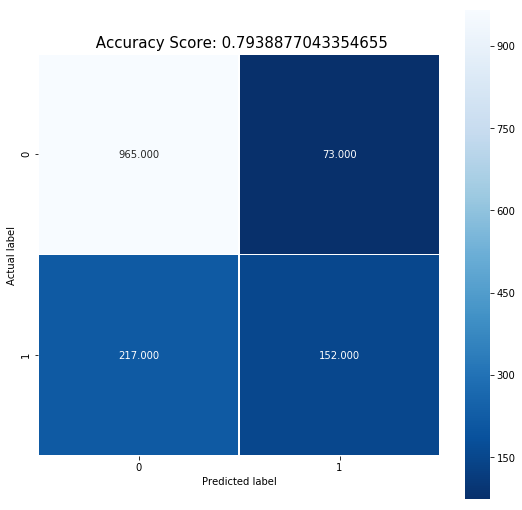

In [9]:
model=m.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


roc_plot(m,x_test,y_test,predictions)

In [12]:
m


SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)